In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report ,precision_score,recall_score, f1_score
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
import random
from IPython import display

np.random.seed(0)

<ipython-input-22-c38951aff8ed>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter_plot = plt.scatter(features[:, 0], features[:, 1], c=labels, cmap=plt.cm.get_cmap('plasma', num_classes), marker='o', s=20)


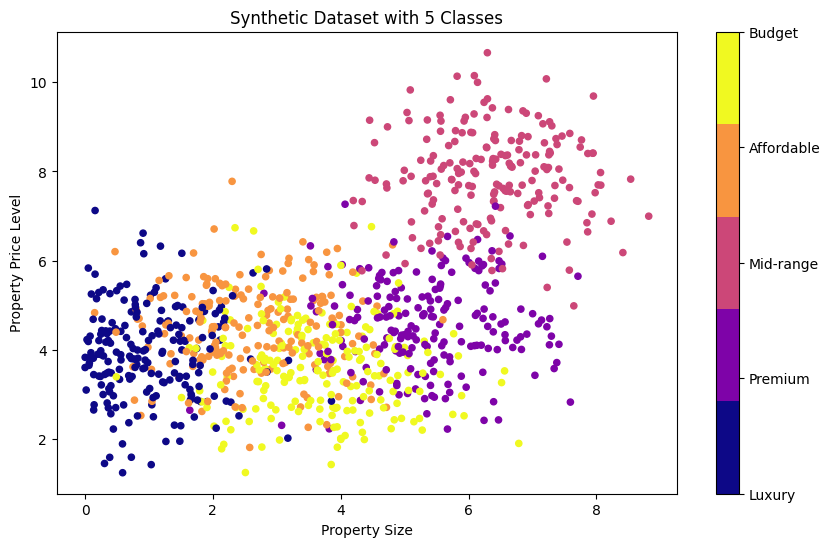

In [22]:
#Data
num_samples = 1000
num_features = 2
num_classes = 5
random_seed = 35

#synthetic data
x, y = make_blobs(n_samples=num_samples, n_features=num_features, centers=num_classes, random_state=random_seed)
x = np.abs(x)
y = np.abs(y)

# Split the dataset
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=random_seed)

#class names
propertyTypes = ['Budget', 'Affordable', 'Mid-range', 'Premium', 'Luxury']

# Plot the dataset
plt.figure(figsize=(10, 6))
scatter_plot = plt.scatter(features[:, 0], features[:, 1], c=labels, cmap=plt.cm.get_cmap('plasma', num_classes), marker='o', s=20)

plt.colorbar(scatter_plot, ticks=range(num_classes)).set_ticklabels(propertyTypes[::-1])
plt.title('Synthetic Dataset with 5 Classes')
plt.xlabel('Property Size')
plt.ylabel('Property Price Level')

plt.show()

In [13]:
features_train

array([[5.83825566, 5.11033923],
       [5.54855586, 4.57058637],
       [6.47778002, 5.99553419],
       ...,
       [6.29652562, 9.62979733],
       [4.71621797, 2.71080358],
       [4.67108676, 2.7003335 ]])

In [14]:
features_test

array([[4.97451887e+00, 3.95003114e+00],
       [4.09891318e+00, 2.63703218e+00],
       [1.56848768e-01, 5.69764259e+00],
       [1.21452145e+00, 3.27969456e+00],
       [6.11600713e-01, 5.11624974e+00],
       [1.90791076e+00, 2.70809974e+00],
       [6.53167425e+00, 5.82079130e+00],
       [3.28869807e+00, 2.84630872e+00],
       [2.90741529e+00, 4.92145300e+00],
       [4.97647681e+00, 7.79173927e+00],
       [1.51505219e+00, 3.99923445e+00],
       [2.18632472e+00, 3.11083029e+00],
       [5.64237284e+00, 4.94822763e+00],
       [1.91806526e+00, 4.97947317e+00],
       [5.09242329e-02, 4.18768411e+00],
       [4.88172376e+00, 2.80105380e+00],
       [3.04546850e-01, 1.45148830e+00],
       [5.43162909e+00, 5.58107600e+00],
       [3.58319790e+00, 5.90483532e+00],
       [3.21999848e+00, 3.48605713e+00],
       [3.42945159e-01, 4.36253764e+00],
       [7.23072135e+00, 5.39988404e+00],
       [2.55908111e+00, 5.36158546e+00],
       [3.78256514e+00, 3.23702546e+00],
       [5.363956

In [15]:
labels_train

array([1, 1, 1, 2, 3, 1, 3, 3, 0, 1, 3, 3, 1, 4, 0, 0, 2, 4, 1, 2, 4, 1,
       2, 3, 3, 1, 0, 1, 2, 1, 4, 1, 3, 2, 0, 1, 4, 3, 3, 1, 3, 4, 2, 0,
       1, 3, 2, 2, 1, 3, 1, 3, 1, 0, 1, 2, 0, 3, 0, 2, 0, 0, 3, 3, 1, 2,
       3, 0, 1, 1, 2, 1, 2, 1, 3, 2, 1, 1, 3, 4, 3, 3, 4, 3, 2, 3, 2, 4,
       3, 1, 1, 1, 1, 1, 1, 0, 4, 3, 3, 0, 2, 2, 2, 1, 1, 0, 3, 3, 2, 2,
       0, 2, 4, 1, 0, 4, 2, 3, 3, 1, 3, 3, 2, 1, 2, 1, 1, 4, 4, 4, 4, 1,
       4, 0, 0, 2, 3, 0, 3, 1, 2, 4, 0, 2, 0, 2, 2, 0, 0, 3, 2, 3, 0, 3,
       2, 4, 1, 3, 2, 2, 2, 0, 0, 3, 2, 3, 2, 2, 4, 4, 3, 0, 1, 3, 3, 1,
       0, 0, 3, 0, 1, 4, 1, 1, 1, 2, 4, 0, 2, 1, 4, 1, 0, 1, 1, 0, 1, 3,
       2, 4, 3, 1, 3, 4, 1, 3, 3, 1, 0, 0, 4, 2, 4, 1, 0, 4, 4, 0, 4, 0,
       2, 4, 4, 4, 0, 2, 4, 4, 4, 1, 4, 4, 0, 2, 4, 4, 0, 4, 2, 4, 3, 2,
       4, 3, 2, 3, 3, 2, 2, 3, 4, 1, 3, 1, 2, 4, 2, 4, 3, 4, 1, 0, 0, 1,
       2, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 3, 4, 3, 1, 3, 0, 2, 3, 1, 1, 3,
       0, 1, 2, 1, 0, 0, 0, 2, 2, 3, 0, 1, 4, 4, 0,

In [16]:
labels_test


array([1, 4, 0, 0, 0, 4, 2, 4, 3, 2, 0, 3, 1, 3, 0, 4, 0, 1, 3, 4, 0, 2,
       3, 4, 4, 2, 1, 2, 0, 1, 0, 2, 0, 2, 1, 4, 1, 3, 3, 0, 4, 1, 0, 0,
       3, 0, 1, 0, 3, 0, 0, 0, 1, 0, 2, 2, 4, 2, 3, 2, 1, 1, 1, 1, 1, 3,
       2, 4, 1, 4, 0, 3, 1, 3, 1, 1, 1, 0, 3, 4, 4, 2, 3, 1, 0, 4, 2, 4,
       2, 0, 3, 1, 0, 2, 4, 1, 4, 1, 1, 0, 1, 2, 4, 3, 4, 3, 4, 4, 3, 0,
       0, 1, 0, 4, 1, 2, 0, 3, 4, 4, 2, 3, 0, 4, 3, 3, 2, 1, 1, 2, 4, 2,
       1, 3, 4, 3, 4, 0, 2, 3, 0, 3, 4, 4, 2, 1, 4, 2, 0, 1, 4, 1, 1, 4,
       3, 3, 4, 1, 1, 1, 0, 2, 1, 3, 3, 1, 3, 1, 0, 2, 0, 4, 0, 0, 2, 2,
       2, 0, 3, 1, 2, 2, 0, 1, 0, 4, 3, 2, 1, 3, 2, 2, 2, 1, 2, 3, 1, 1,
       0, 3])

In [17]:
print("Shapes of Each Segment in the Dataset:")
print("Training Features Shape:", features_train.shape)
print("Training Labels Shape:", labels_train.shape)
print("Testing Features Shape:", features_test.shape)
print("Testing Labels Shape:", labels_test.shape)


Shapes of Each Segment in the Dataset:
Training Features Shape: (800, 2)
Training Labels Shape: (800,)
Testing Features Shape: (200, 2)
Testing Labels Shape: (200,)


In [18]:
class NeuralNetwork(object):
    def __init__(self):
        iLn = 2
        hLN1 = 500
        hLN2 = 500
        hLN3 = 500
        oLn = num_classes  # Assuming num_classes is defined earlier
        self.eta = 0.1

        # Weights
        self.wHL1 = np.random.randn(iLn, hLN1)
        self.wHL2 = np.random.randn(hLN1, hLN2)
        self.wHL3 = np.random.randn(hLN2, hLN3)
        self.WO = np.random.randn(hLN3, oLn)

        # Biases
        self.b1 = np.zeros((1, hLN1))
        self.b2 = np.zeros((1, hLN2))
        self.b3 = np.zeros((1, hLN3))
        self.WB = np.zeros((1, oLn))

    def sigmoid(self, features):
        return 1 / (1 + np.exp(-features))

    def sigmoid_dev(self, features):
        return  features * (1-features)

    def softmax(self, features):
        exp_x = np.exp(features - np.max(features, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def ForwardProp(self, features):
        self.HO1 = self.sigmoid(np.dot(features, self.wHL1) + self.b1)
        self.HO2 = self.sigmoid(np.dot(self.HO1, self.wHL2) + self.b2)
        self.HO3 = self.sigmoid(np.dot(self.HO2, self.wHL3) + self.b3)
        self.output = self.softmax(np.dot(self.HO3, self.WO) + self.WB)
        return self.output

    def BackProp(self, features, labels):
        m = features.shape[0]

        # Output layer error
        diff_out = self.output - labels
        d_WO = (1/m) * np.dot(self.HO3.T, diff_out)
        d_WB = (1/m) * np.sum(diff_out, axis=0, keepdims=True)

        # Backprop through layers
        d_hidden3 = np.dot(diff_out, self.WO.T) * self.sigmoid_dev(self.HO3)
        d_W_HI3 = (1/m) * np.dot(self.HO2.T, d_hidden3)
        d_b3 = (1/m) * np.sum(d_hidden3, axis=0, keepdims=True)

        d_hidden2 = np.dot(d_hidden3, self.wHL3.T) * self.sigmoid_dev(self.HO2)
        d_W_HI2 = (1/m) * np.dot(self.HO1.T, d_hidden2)
        d_b2 = (1/m) * np.sum(d_hidden2, axis=0, keepdims=True)

        d_hidden1 = np.dot(d_hidden2, self.wHL2.T) * self.sigmoid_dev(self.HO1)
        d_W_HI1 = (1/m) * np.dot(features.T, d_hidden1)
        d_b1 = (1/m) * np.sum(d_hidden1, axis=0, keepdims=True)

        # Update weights and biases
        self.WO -= self.eta * d_WO
        self.WB -= self.eta * d_WB
        self.wHL3 -= self.eta * d_W_HI3
        self.b3 -= self.eta * d_b3
        self.wHL2 -= self.eta * d_W_HI2
        self.b2 -= self.eta * d_b2
        self.wHL1 -= self.eta * d_W_HI1
        self.b1 -= self.eta * d_b1

    def predict(self, features):
        probabilities = self.ForwardProp(features)
        return np.argmax(probabilities, axis=1)

    @staticmethod
    def ReLU(features, derivative=False):
        if derivative:
            return np.where(features <= 0, 0, 1)
        else:
            return np.maximum(0, features)

In [19]:
NN = NeuralNetwork()

In [20]:
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

labels_train_one_hot = one_hot_encode(labels_train, num_classes)


Epoch 0, Loss: 10.2639
Epoch 100, Loss: 1.6380
Epoch 200, Loss: 1.0219
Epoch 300, Loss: 1.2282
Epoch 400, Loss: 1.5240
Epoch 500, Loss: 1.4415
Epoch 600, Loss: 1.2391
Epoch 700, Loss: 1.1132
Epoch 800, Loss: 1.1789
Epoch 900, Loss: 1.2072
Epoch 1000, Loss: 1.1937
Epoch 1100, Loss: 1.1314
Epoch 1200, Loss: 1.0292
Epoch 1300, Loss: 1.0153
Epoch 1400, Loss: 1.0211
Epoch 1500, Loss: 1.0466
Epoch 1600, Loss: 1.1207
Epoch 1700, Loss: 0.9084
Epoch 1800, Loss: 1.0287
Epoch 1900, Loss: 1.0083
Epoch 2000, Loss: 1.0199
Epoch 2100, Loss: 0.9918
Epoch 2200, Loss: 0.9013
Epoch 2300, Loss: 1.0225
Epoch 2400, Loss: 0.9883
Epoch 2500, Loss: 0.9761
Epoch 2600, Loss: 0.9943
Epoch 2700, Loss: 0.9554
Epoch 2800, Loss: 0.9343
Epoch 2900, Loss: 0.8540
Epoch 3000, Loss: 0.8202
Epoch 3100, Loss: 1.1278
Epoch 3200, Loss: 0.9713
Epoch 3300, Loss: 0.9134
Epoch 3400, Loss: 0.9640
Epoch 3500, Loss: 0.9176
Epoch 3600, Loss: 0.9188
Epoch 3700, Loss: 0.9402
Epoch 3800, Loss: 0.9271
Epoch 3900, Loss: 0.9266
Epoch 4000,

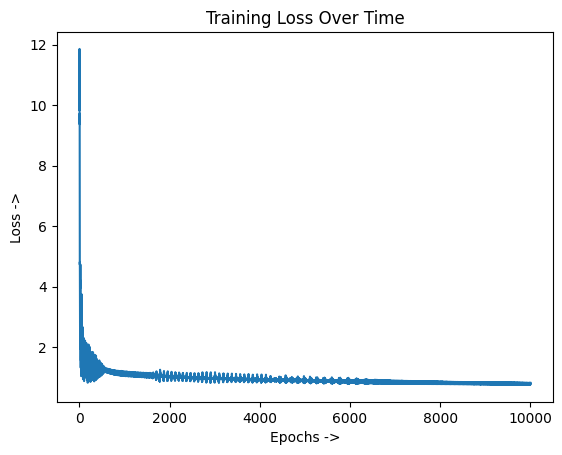

In [21]:
err = []
epochs = 10000

for i in range(epochs):
    output = NN.ForwardProp(features_train)
    NN.BackProp(features_train, labels_train_one_hot)

    # Calculating loss using cross-entropy
    loss = np.mean(-np.sum(labels_train_one_hot * np.log(output + 1e-9), axis=1))  # Added a small epsilon to avoid log(0)
    err.append(loss)

    if i % 100 == 0:
        print(f'Epoch {i}, Loss: {loss:.4f}')

plt.plot(err)
plt.xlabel('Epochs ->')
plt.ylabel('Loss ->')
plt.title('Training Loss Over Time')
plt.show()

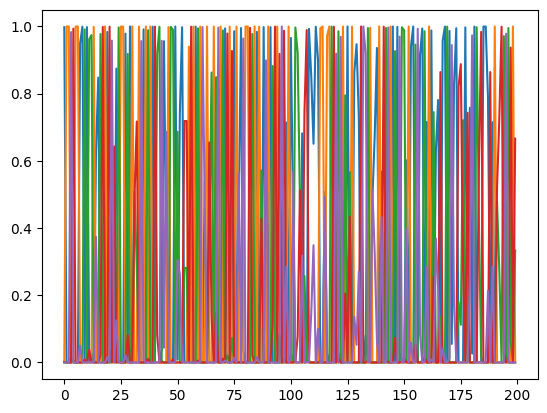

In [51]:
# testing
yPred = NN.ForwardProp(features_test)
plt.plot(yPred)

In [56]:
# test 1
size1 = 15
price1 = 15
test1 = NN.ForwardProp([[size1, price1]])

predicted_class = np.argmax(test1)

print("Classes with Probabilities:\n")
for i, name in enumerate(propertyTypes):
    print(f"Class {i+1} ({name}): {test1[0][i]:.4f}")

print("\nPredicted Class:")
print(f"{propertyTypes[predicted_class]} ({test1[0][predicted_class]:.4f})")

Classes with Probabilities:

Class 1 (Budget): 0.0002
Class 2 (Affordable): 0.0000
Class 3 (Mid-range): 0.0000
Class 4 (Premium): 0.9998
Class 5 (Luxury): 0.0000

Predicted Class:
Premium (0.9998)


In [57]:
# test 2
size2 = 30
price2 = 30
test2 = NN.ForwardProp([[size2, price2]])

predicted_class = np.argmax(test2)

print("Classes with Probabilities:\n")
for i, name in enumerate(propertyTypes):
    print(f"Class {i+1} ({name}): {test2[0][i]:.4f}")

print("\nPredicted Class:")
print(f"{propertyTypes[predicted_class]} ({test2[0][predicted_class]:.4f})")

Classes with Probabilities:

Class 1 (Budget): 0.0002
Class 2 (Affordable): 0.0000
Class 3 (Mid-range): 0.0000
Class 4 (Premium): 0.9998
Class 5 (Luxury): 0.0000

Predicted Class:
Premium (0.9998)


In [60]:
yPredCls = np.argmax(yPred, axis=1)

#Accuracy
accuracy = accuracy_score(labels_test, yPredCls)
print("Accuracy of this model :", accuracy*100,'%')

Accuracy of this model : 79.5 %
